# The Game

There are `p` systems with `k` unique numbers each from 0 $\ldots$ `n`. The goal is to find a dropping strategy for each system that efficiently sorts the numbers in ascending order.

In [6]:
from typing import Optional
from threading import Lock, Thread
import random

class Player:
    def __init__(self, name: str):
        self.name = name
    def init(self, cards, lock: Lock, queue):
        self.cards = sorted(cards)
        self.lock = lock
        self.queue = queue
    def run(self):
        while self.cards:
            self.update()
    def dropCard(self):
        self.lock.acquire()
        self.queue.append(self.cards.pop(0))
        self.lock.release()
    def update(self):
        pass

class TheGame:
    def __init__(self, n, k, players: list[Player]):
        self.lock = Lock()
        self.deck = [i for i in range(n)]
        random.shuffle(self.deck)
        self.queue = []
        # for each player, draw k random cards from the deck
        self.players = players
        for p in self.players:
            p.init([self.deck.pop() for _ in range(k)], self.lock, self.queue)
    def run(self):
        expected = sorted([card for player in self.players for card in player.cards])
        print(expected)
        threads = [Thread(target=player.run) for player in self.players]
        for t in threads:
            t.start()
        for t in threads:
            t.join()
        print(self.queue)
        return expected, self.queue


## Lazy Sorting

Every system just waits the number of iterations on their card to drop it

In [7]:
import time

class LazyPlayer(Player):
    def init(self, cards: list, lock: Lock, queue):
        super().init(cards, lock, queue)
        self.iters = 0
    def update(self):
        lowest = self.cards[0]
        if self.iters >= lowest:
            self.dropCard()
        time.sleep(0.01)
        self.iters += 1

### Testing

In [8]:
game = TheGame(10**3, 2, [LazyPlayer(f"Player {i}") for i in range(5)])
expected, returned = game.run()

[150, 151, 280, 389, 401, 410, 451, 631, 654, 804]
[150, 151, 280, 389, 401, 410, 451, 631, 654, 804]


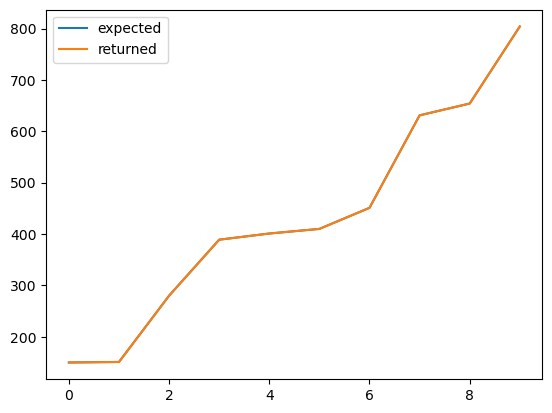

In [9]:
from matplotlib import pyplot as plt
plt.plot(expected, label='expected')
plt.plot(returned, label='returned')
plt.legend()
plt.show()